# Project Plant Growth Dataset Analysis
***

### Description
This project involves analyzing the PlantGrowth dataset, which includes data on plant weights across three groups: a control group (ctrl) and two treatment groups (trt1 and trt2). The analysis employs statistical techniques such as t-tests and ANOVA to determine if there are significant differences between these groups.

In [1]:
# Import libs
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

### Block 1: Loading and Initial Data Analysis

In [2]:
# Load the data and inspect its structure
file_path = 'PlantGrowth.csv'
data = pd.read_csv(file_path)
data_cleaned = data.drop(columns=['rownames'])  # Remove unnecessary column

In [3]:
# Inspect data
data.head()

,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [4]:
# Descriptive statistics
summary = data_cleaned.groupby('group')['weight'].describe()
print("Descriptive statistics for each group:\n", summary)

Descriptive statistics for each group:
        count   mean       std   min     25%    50%     75%   max
group                                                           
ctrl    10.0  5.032  0.583091  4.17  4.5500  5.155  5.2925  6.11
trt1    10.0  4.661  0.793676  3.59  4.2075  4.550  4.8700  6.03
trt2    10.0  5.526  0.442573  4.92  5.2675  5.435  5.7350  6.31


### Conclusion:
The data includes three groups: ctrl, trt1, and trt2, each containing 10 observations.
The highest mean weight is in group trt2 (5.526), while the lowest is in trt1 (4.661).

### Block 2: Visualization of Plant Weight Distribution

C:\Users\Serhii\AppData\Local\Temp\ipykernel_13596\1251754556.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group', y='weight', data=data_cleaned, palette='Set3')


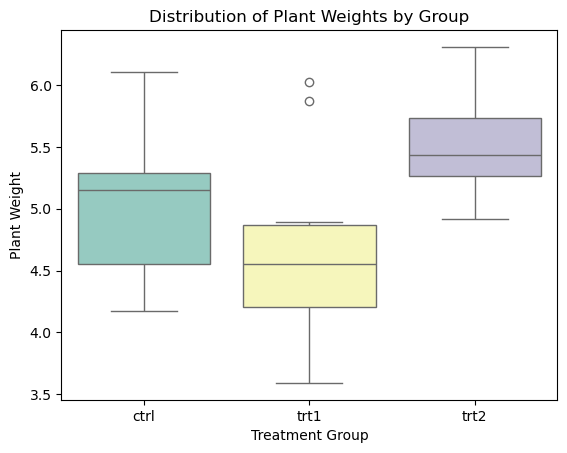

In [5]:
# Visualize the distribution of weights across groups
sns.boxplot(x='group', y='weight', data=data_cleaned, palette='Set3')
plt.title("Distribution of Plant Weights by Group")
plt.xlabel('Treatment Group')
plt.ylabel('Plant Weight')
plt.show()

### Conclusion:
The groups exhibit different weight distributions. It is evident that the median weight in group trt2 is higher than in other groups.

### Block 3: Explanation of the t-Test

#### T-Test
The t-test is used to determine if there is a statistically significant difference between the means of two groups.

#### Key Assumptions:
1. **Normality**: Data in each group should be approximately normally distributed.
2. **Equal Variances**: The variances of the two groups should be roughly equal (for a standard t-test).
3. **Independence**: Data between groups should be independent.

#### Real-World Example:
A t-test can be found in clinical studies where the effectiveness of two different drugs is tested. For instance, determining whether there is a difference in the average reduction in blood pressure between patients receiving Drug A and Drug B.

#### Block 4: Conducting the t-Test between trt1 and trt2

In [6]:
# Separate data for test
trt1_weights = data_cleaned[data_cleaned['group'] == 'trt1']['weight']
trt2_weights = data_cleaned[data_cleaned['group'] == 'trt2']['weight']

In [7]:
# Perform t-test
t_stat, p_value = stats.ttest_ind(trt1_weights, trt2_weights, equal_var=True)
print(f"T-Test Results:\n T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

T-Test Results:
 T-Statistic: -3.0101, P-Value: 0.0075


### Conclusion:
Results of the t-test indicate whether there is statistically significant difference between the mean values of trt1 and trt2.
The next step is to perform ANOVA to analyze more than two groups.